# Exploratory Data Analysis - Hotel Bookings Dataset
Authored by: Robert Culligan

## Introduction

One kind of project I wanted to conduct was a simple Exploratory Data Analysis. This would generally mean getting an overall summary of the dataset, clean some of the columns, outline the of the numerical and categorical variables, as well as outlinte the deviations in numerical groups.

This is a fictional dataset that describes the customer base of a fictional hotel chain. There are two branches in this chain - "City Hotel" and "Resort Hotel". This data set records a number of variables - such as occupation, children in Party, nights stayed, and reservation status.

Considering the data available and the scope of the project, I'd like to understand the distribution of the categorical and numerical factors. I'd particularly like to understand how stay length varies throughout the year - along with the deviation of those variables. Moreover, I'd like to understand how the family dynamic influences these factors.

## Loading packages & datasets

In [ ]:
library(ggplot2)
library(forcats)
library(dplyr)
library(datasets)

These are the packages I intend to use when analyzing this dataset. You can also see me loading th dataset below.

In [3]:
hotel_demand <- read.csv('/Users/robertculligan/Desktop/R/Datasets/Hotel_Demand/hotel_bookings.csv')

I have stored this information on a password protected cloud.

## Preliminary Analysis

This first function will highlight the shape of our dataset.

In [4]:
dim(hotel_demand)

[1] 119390     32

The next function will highlight the column titles of the dataset.

In [5]:
names(hotel_demand)

[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"

What is apparent in this assessment is that the the date, month, and year are all in different columns. This change will make it difficult to assess data when time is a variable. What also is causing pause are the stay length variables being separated into weekday and weekend columns. Total nights stayed can be acquired by adding these columns together.

In [6]:
str(hotel_demand)

'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : int  0 0 0 0 0 0 0 0 1 1 ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                 

What's also clear is that the reservation date is also presented as a string, meaning that they will not be recognised as a date - further hampering analysis.

## Preliminary Cleaning

This function will convert the month column to a month, meaning the column will convert the month into an integer.

In [7]:
hotel_demand$arrival_date_month <- sapply(hotel_demand$arrival_date_month, function(x) grep(paste("(?i)",x,sep=""), month.name))

Consequently, I am now going to merge the three date columns into a single string called "arrivaldate".

In [8]:
hotel_demand$arrivaldate <- paste(hotel_demand$arrival_date_day_of_month,"-",hotel_demand$arrival_date_month,"-",hotel_demand$arrival_date_year)
hotel_demand$arrivaldate <- gsub('\\s+','',hotel_demand$arrivaldate)
hotel_demand$staylength <- (hotel_demand$stays_in_week_nights+hotel_demand$stays_in_weekend_nights)

Now that we have a string date for both factors, we can now convert them to the date format.

In [9]:
hotel_demand$arrivaldate <- as.Date(hotel_demand$arrivaldate, format = "%d-%m-%Y")
hotel_demand$reservation_status_date <- as.Date(hotel_demand$reservation_status_date, format = "%Y-%m-%d")

Finally, I am going to remove some duplicates.

In [ ]:
hotel_demand[!duplicated(hotel_demand$Sepal.Width), ]

## Secondary Assessment

This function will outline the general distribution of values across the data frame.

In [11]:
summary(hotel_demand)

    hotel            is_canceled       lead_time   arrival_date_year
 Length:119390      Min.   :0.0000   Min.   :  0   Min.   :2015     
 Class :character   1st Qu.:0.0000   1st Qu.: 18   1st Qu.:2016     
 Mode  :character   Median :0.0000   Median : 69   Median :2016     
                    Mean   :0.3704   Mean   :104   Mean   :2016     
                    3rd Qu.:1.0000   3rd Qu.:160   3rd Qu.:2017     
                    Max.   :1.0000   Max.   :737   Max.   :2017     
                                                                    
 arrival_date_month arrival_date_week_number arrival_date_day_of_month
 Min.   : 1.000     Min.   : 1.00            Min.   : 1.0             
 1st Qu.: 4.000     1st Qu.:16.00            1st Qu.: 8.0             
 Median : 7.000     Median :28.00            Median :16.0             
 Mean   : 6.552     Mean   :27.17            Mean   :15.8             
 3rd Qu.: 9.000     3rd Qu.:38.00            3rd Qu.:23.0             
 Max.   :12.000     Ma

## Visualising the data, addressing outliers, and invalid inputs

### Distribution of Numerical Factors

#### Histograms

This first histogram describes the distribution of stay lengths at both hotels.

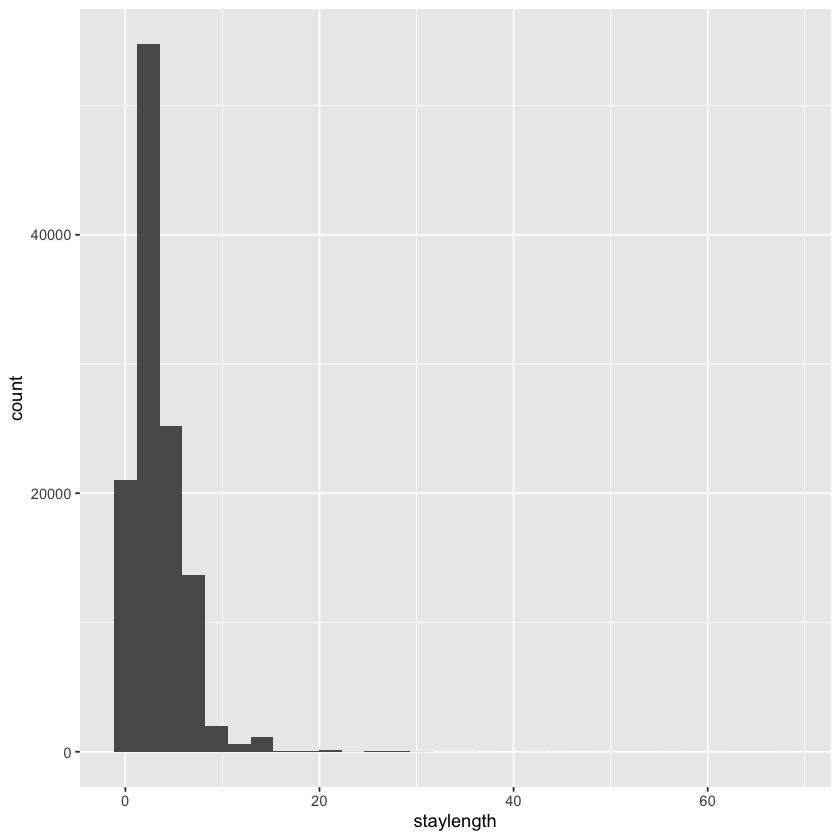

In [13]:
data2<-hotel_demand[!(hotel_demand$staylength==0),]
ggplot(data2, aes(x=staylength))+
  geom_histogram(bins = 30)

In this histogram, I decided to exclude stay lengths labelled 'O'. You can't stay at a hotel for 0 days - so I believe its an invalid that skews the data.

The next graph presents the distribution of family size choosing to stay at both hotels.

Warning message:
"Removed 4 rows containing non-finite values (`stat_bin()`)."


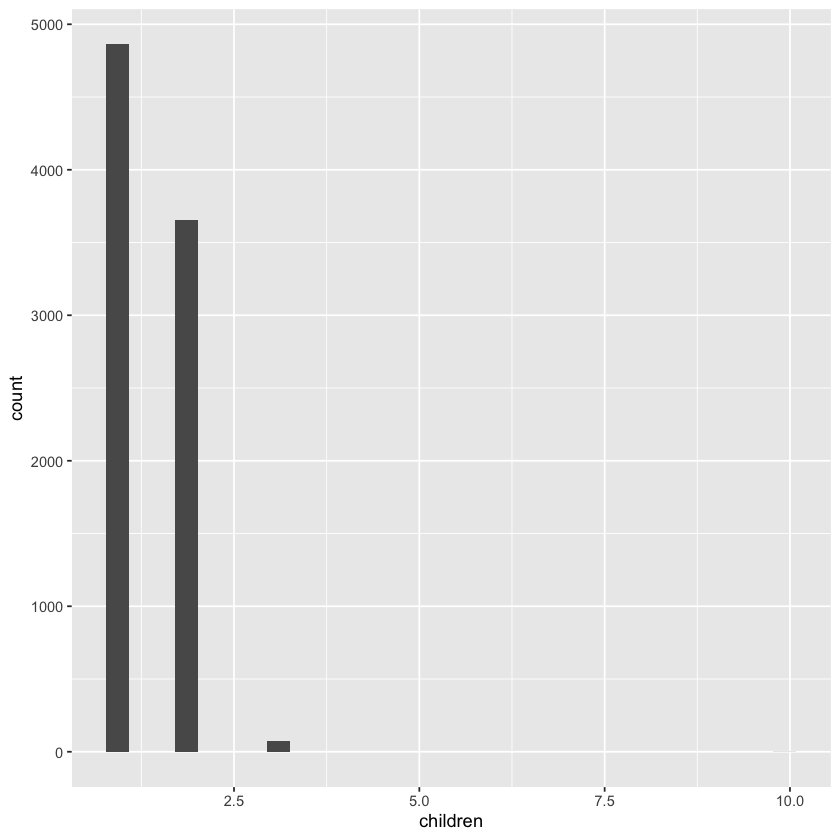

In [26]:
data3<-hotel_demand[!(hotel_demand$children==0),]
ggplot(data3, aes(x=children))+
  geom_histogram(bins = 30)

Similarly, I also excluded rows with "0" children. This graph specifically identifies distributions in families.

### Distribution of Catagorical Factors

### Bar Graphs

This is a simple bar graph that outlines how stays are distributed between the "city" and "resort" hotels.

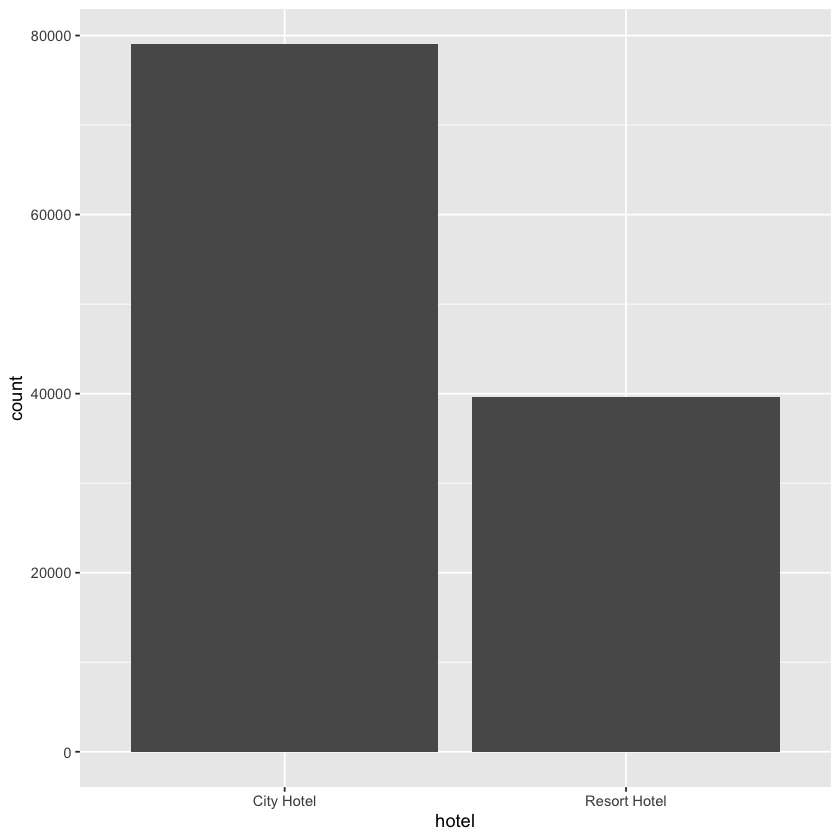

In [13]:
ggplot(data2, aes(x=hotel))+
  geom_bar()

Similarly, this graph outlines the distribution within the Market segment variable.

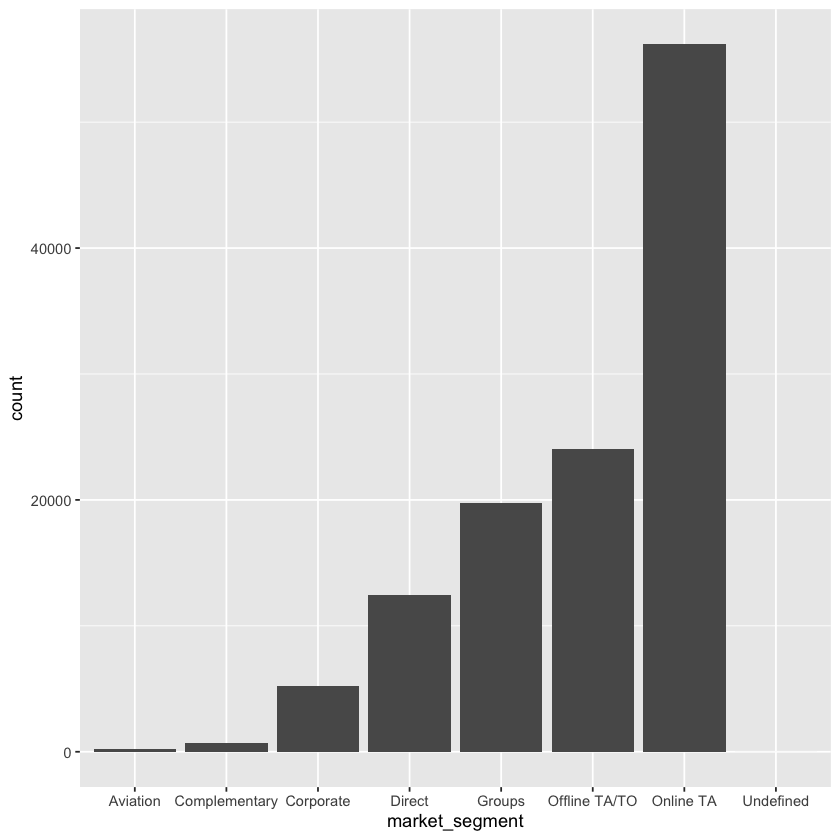

In [14]:
ggplot(data2, aes(x=market_segment))+
  geom_bar()

Similarly, this graph outlines the distribution within the Customer_Type variable.

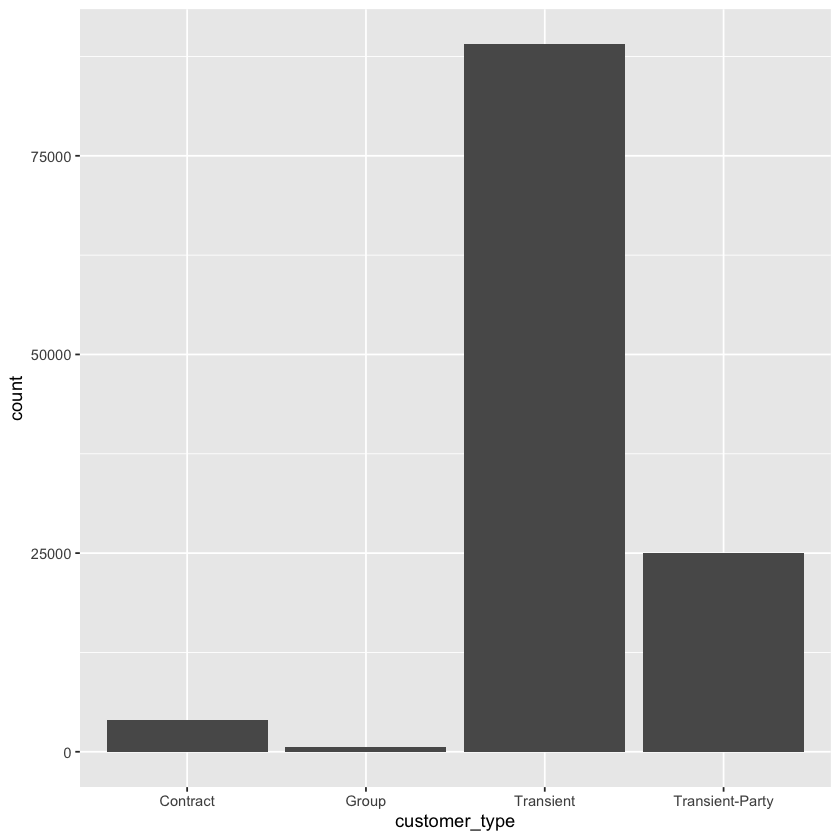

In [15]:
ggplot(data2, aes(x=customer_type))+
  geom_bar()

Similarly, this graph outlines the distribution within the reservation_status variable.

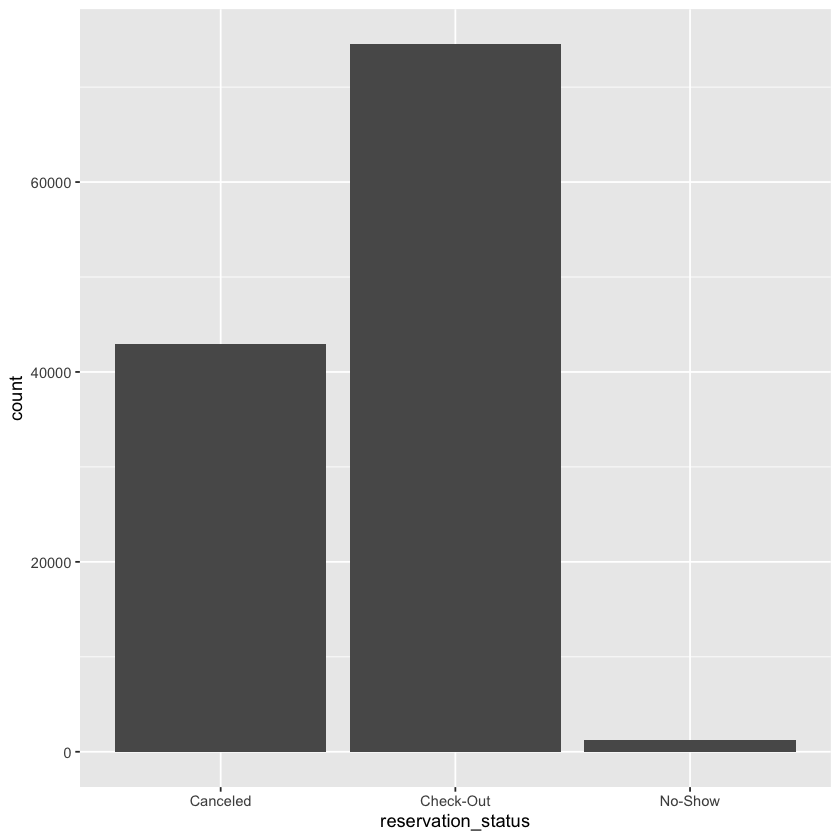

In [16]:
ggplot(data2, aes(x=reservation_status))+
  geom_bar()

Similarly, this graph outlines the distribution stays throughout the year, separated between the "city" and "resort" hotels.

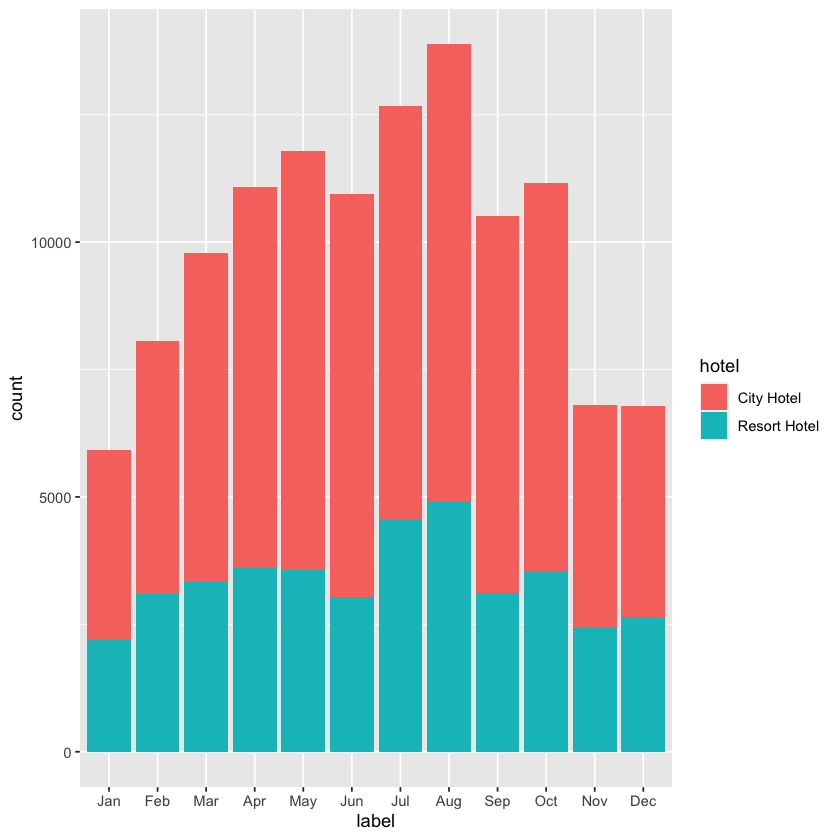

In [30]:
data2 <-
  hotel_demand %>%
  mutate(
    month = format(arrivaldate, "%m"),
    label = format(arrivaldate, "%b"),
    label = fct_reorder(label, month, min)
  )
ggplot(data2, aes(x = label, fill = hotel)) +
  geom_bar()

Moreover, this boxplot outlines the distribution of stays throughout the year  - with both "city" and "resort" being represented.

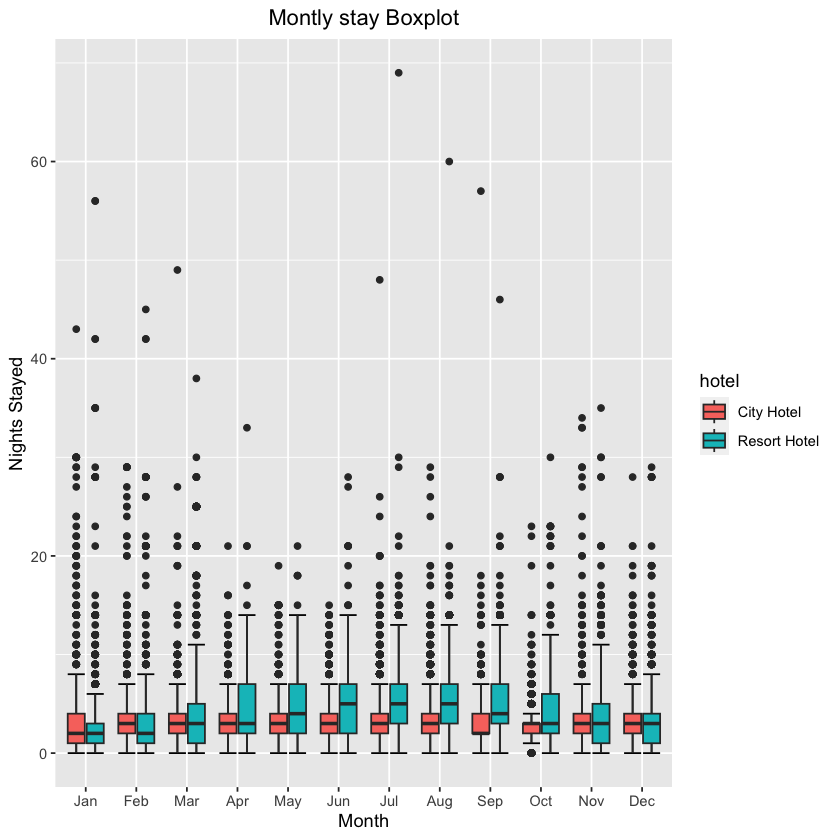

In [44]:
ggplot(data2, aes(x = label, y = staylength, fill = hotel)) +
  stat_boxplot(geom = "errorbar") +
  geom_boxplot()+
  xlab("Month") +
  ylab("Nights Stayed") +
  labs(title = "Montly stay Boxplot") +
  theme(plot.title = element_text(hjust = 0.5))